In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# create a conv2d class instance with parameters

# parameters
inChans = 3 # RGB
outChans = 15 # 15 feature maps therefore there are 15 diff kernel each of size 5x5
krnSize = 5 # should be odd number
stride = 1
padding = 0

# create the instance (cf nn.Linear)
c = nn.Conv2d(inChans, outChans, krnSize, stride, padding)

print(c)
print(' ')

# check out it's weight tensor; what are the dimensions?
print('Size of weights: ' + str(c.weight.shape))
print('Size of bias: ' + str(c.bias.shape))

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([15, 3, 5, 5])
Size of bias: torch.Size([15])


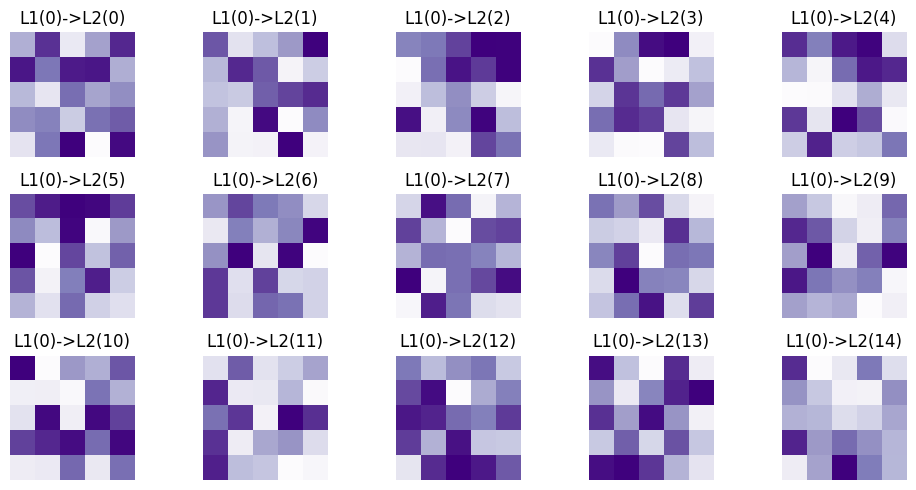

In [4]:
# visualize the kernels

fig, axs = plt.subplots(3, 5,figsize = (10, 5))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(torch.squeeze(c.weight[i, 0, :, :]).detach(), cmap = "Purples")
    ax.set_title("L1(0)->L2(%s)" %i)
    ax.axis("off")

plt.tight_layout()
plt.show()

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


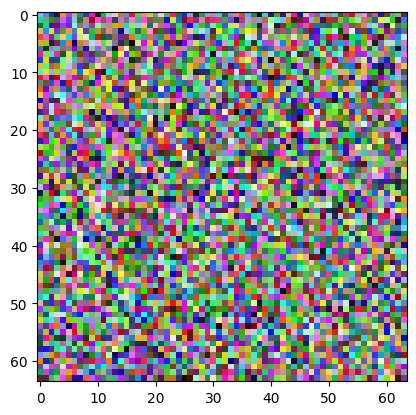

In [7]:
# size of the image (N, RGB, width, height)
imsize = (1, 3, 64, 64)
# 1 → batch size (one image),
# 3 → number of channels (e.g., RGB),
# 64, 64 → height and width of the image.

img = torch.rand(imsize)

# pytorch wants channels first but matplotlib wants channels last
# therefore, tensors must be permuted to visualize
img2view = img.permute(2, 3, 1, 0).numpy() 
# imsize = (1, 3, 64, 64)
# 2 = 64, 3 = 64, 1 = 3, 0 = 1

print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view))

In [8]:
# convolve the image with the filter bank (set of 'outChans' kernels)
convRes = c(img)

print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


In [10]:
# 1 = no.of pictures
# 15 = number of kernels / number of feature maps
# 60x60 = size of result of convolution (Nh formula check notes)

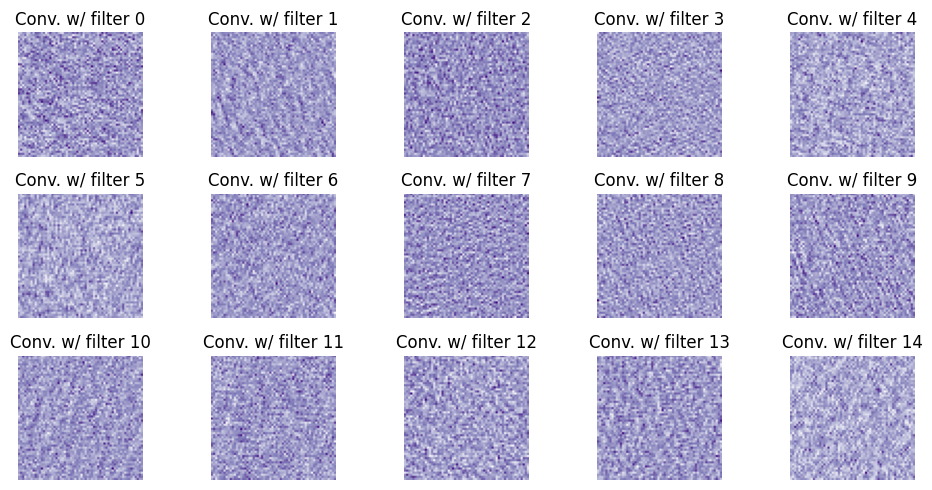

In [11]:
fig, axs = plt.subplots(3, 5, figsize = (10, 5))

for i, ax in enumerate(axs.flatten()):

  # extract this "layer" of the convolution result
  I = torch.squeeze(convRes[0, i, :, :]).detach()

  # and visualize it
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s' %i)
  ax.axis('off')

plt.tight_layout()
plt.show()